Objectives of this code 

- assign probe molecule 
- import reference molecules from DeepFMPO v3D molecules.smi file 

- the molecules will be presented visually 

- similarities will be calculated via Gasteiger and MMFF calculations 

- table presentation (in this order):
    - list of reference molecules 
    - shape similarity 
    - charges similarity 
    - average value between shape and charges similarity 
    - rank of shape similarity 
    - rank of charges similarity 
    - rank of average values 

- scatter plots to show correlation between:
    - shape vs average via Gasteiger 
    - shape vs average via MMFF 
    - average values calculated by Gasteiger vs MMFF 
    - rank of shape similarity Gasteiger vs MMFF 
    - rank of charges similarity Gasteiger vs MMFF 
    - rank of average values Gasteiger vs MMFF 

- Correlation calculations for each plot:
    - correlation coefficient (R2 value)
    - Spearman rank correlation 



In [2]:
# Functions and libraries imported for this code 

# prerequisites: RDKit, py3Dmol, small espsim package 

from rdkit import Chem 
from rdkit.Chem import Draw 
import py3Dmol 
from ipywidgets import interact, interactive, fixed 
from espsim import EmbedAlignConstrainedScore, EmbedAlignScore, ConstrainedEmbedMultipleConfs, GetEspSim, GetShapeSim 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy 
import numpy as np 
import scipy.stats as ss 
from scipy.stats import spearmanr 

In [3]:
# Probe molecule 
prbSmile='C(C(C(=O)O)O)O'
# Adding H to the molecules since the Smiles do no include H
prbMol=Chem.AddHs(Chem.MolFromSmiles(prbSmile)) 

# Reference molecules 
header_list=["smiles"] 
# opening file containing reference molecule 
refSmiles = pd.read_csv('/Users/yada/Documents/UCL/Dissertation/deepFMPOv3D-main/Data/molecules.smi',header=None,names=header_list) 
refMols=[Chem.AddHs(Chem.MolFromSmiles(x)) for x in refSmiles["smiles"]] 

In [4]:
# SIMILARITY CALCULATION USING GASTEIGER 

simShape_Gas,simEsp_Gas=EmbedAlignScore(prbMol,refMols,getBestESP=True,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "gasteiger",renormalize = True) 

# Calculating average 
avrlist_Gas=[] 
for i in range(len(refSmiles)): 
    avr=(simShape_Gas[i]+simEsp_Gas[i])/2
    avrlist_Gas.append(avr) 

# Ranking 
rank_Gas_Shape = ss.rankdata(simShape_Gas) # Ranking shape 
rank_Gas_ESP = ss.rankdata (simEsp_Gas) # Ranking ESP
rank_Gas_avr = ss.rankdata(avrlist_Gas) # Ranking average values 

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average")) 
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_Gas[i],simEsp_Gas[i],avr,rank_Gas_Shape[i],rank_Gas_ESP[i],rank_Gas_avr[i]))

  

RDKit ERROR: [17:28:15] UFFTYPER: Unrecognized charge state for atom: 16
[17:28:15] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [17:31:09] UFFTYPER: Unrecognized charge state for atom: 17
[17:31:09] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [17:31:53] UFFTYPER: Unrecognized charge state for atom: 16
[17:31:53] UFFTYPER: Unrecognized charge state for atom: 16


                                                           Reference    Shape     ESP    Average Rank Shape Rank ESP Rank Average
    S(=O)(=O)(N)c1ccc(N/N=C/2\C(=O)Nc3c\2c(/C=C/c2ccc(O)cc2)ccc3)cc1     0.22     0.76     0.51   277.00   791.00   576.00
    S(=O)(=O)(Nc1cc(-c2[nH]nc(Nc3ccc(S(=O)(=O)N)cc3)c2)ccc1)c1ccccc1     0.21     0.72     0.51   164.00   528.00   286.00
                           O=Nc1c(-c2c(O)[nH]c3c2cccc3)[nH]c2c1cccc2     0.35     0.81     0.51  1021.00  1000.00  1042.00
            O=C1NC(=O)c2c3c4n(c5c3cccc5)C3OC(n5c4c(c4c5cccc4)c12)CC3     0.25     0.73     0.51   609.00   570.00   579.00
                Brc1ccc(CC(=O)Nc2n[nH]c3c2cc(N2S(=O)(=O)CCC2)cc3)cc1     0.24     0.76     0.51   444.00   809.00   678.00
                 Clc1cc(Nc2nc(N3[C@@H](CO)CCC3)nc3n(C(C)C)cnc23)ccc1     0.26     0.74     0.51   710.00   689.00   724.00
                        OC[C@H](Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1)CC     0.24     0.74     0.51   523.00   691.00   631.00
         

In [5]:
# SIMILARITY CALCULATION WITH MMFF 

simShape_mmff,simEsp_mmff=EmbedAlignScore(prbMol,refMols,getBestESP=True,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "mmff",renormalize = True) 

avrlist_mmff=[]
for i in range(len(refSmiles)): 
    avr=(simShape_mmff[i]+simEsp_mmff[i])/2
    avrlist_mmff.append(avr)

rank_mmff_avr = ss.rankdata(avrlist_mmff)
rank_mmff_Shape = ss.rankdata(simShape_mmff)
rank_mmff_ESP = ss.rankdata(simEsp_mmff)

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average"))
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_mmff[i],simEsp_mmff[i],avr,rank_mmff_Shape[i],rank_mmff_ESP[i],rank_mmff_avr[i]))
  
    

RDKit ERROR: [17:43:13] UFFTYPER: Unrecognized charge state for atom: 16
[17:43:13] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [17:46:35] UFFTYPER: Unrecognized charge state for atom: 17
[17:46:35] UFFTYPER: Unrecognized charge state for atom: 17
[17:47:23] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [17:47:23] UFFTYPER: Unrecognized charge state for atom: 16


MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger c

In [6]:
# Correlation coefficient function  

def CorrCoef (x,y):
    corr_matrix = numpy.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print ('Correlation coeffcient = %.3f' % R_sq)
    return


In [7]:
# Spearmans rank Function 

def SpearRank (x,y):
	# Calculating correlation coefficient 
	coef, p = spearmanr(x,y)
	print('Spearmans correlation coefficient: %.3f' % coef)
	

# Running the example calculates the Spearman’s correlation coefficient between the two variables in the test dataset.

# The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely 
# 95% confidence of rejecting hypothesis 



In [8]:
def RegLine (x,y):
    # Fit linear regression via least squares with numpy.polyfit
    # It returns an slope (b) and intercept (a)
    # deg=1 means linear fit (i.e. polynomial of degree 1)
    b, a = np.polyfit(x,y, deg=1)
    # Create sequence of number 
    xseq = np.linspace(0, 1)
    # Plot regression line
    ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
    return 

SIMILARITY SCORES - GASTEIGER

Correlation coeffcient = 0.055
Spearmans correlation coefficient: 0.245


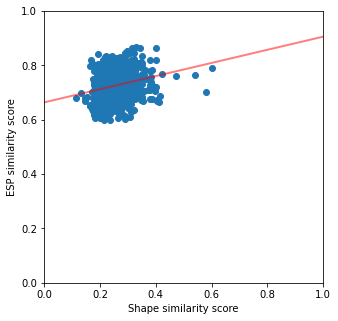

In [9]:
# SHAPE VS ESP

# Setting size of plot 
fig, ax = plt.subplots(figsize = (5,5)) 
# Setting axis ranges 
# Similarity calculations ranges from 0-1, the closer to 1 the higher the similarity 
plt.xlim(0,1)
plt.ylim(0,1)
#Setting axis labels and plot title 
plt.xlabel("Shape similarity score")
plt.ylabel("ESP similarity score")
# this is the order that you have to follow 
# important to set up the axis labels and ranges before presenting the plot 
ax.scatter (simShape_Gas, simEsp_Gas ) 

# Regression line 
RegLine(simShape_Gas, simEsp_Gas)

# Correlation coefficient R2 value 
CorrCoef(simShape_Gas, simEsp_Gas)

# Spearman rank 
SpearRank(simShape_Gas, simEsp_Gas)

Correlation coeffcient = 0.607
Spearmans correlation coefficient: 0.728


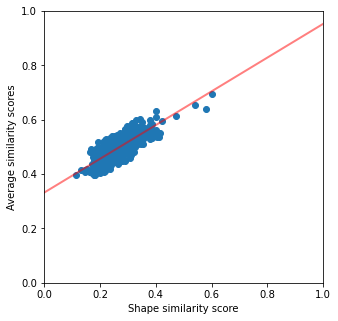

In [10]:
# SHAPE VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Shape similarity score")
plt.ylabel("Average similarity scores")
ax.scatter (simShape_Gas, avrlist_Gas ) 

RegLine(simShape_Gas, avrlist_Gas)
CorrCoef(simShape_Gas, avrlist_Gas)
SpearRank(simShape_Gas, avrlist_Gas)

Correlation coeffcient = 0.628
Spearmans correlation coefficient: 0.811


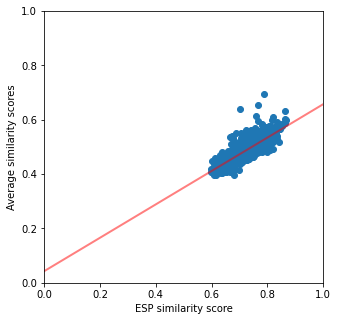

In [11]:
# ESP VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("ESP similarity score")
plt.ylabel("Average similarity scores")
ax.scatter (simEsp_Gas, avrlist_Gas ) 

RegLine(simEsp_Gas, avrlist_Gas)
CorrCoef(simEsp_Gas, avrlist_Gas)
SpearRank(simEsp_Gas, avrlist_Gas)

PLOTS FOR SCORE RANKINGS BY GASTEIGER 

Correlation coeffcient = 0.060
Spearmans correlation coefficient: 0.245


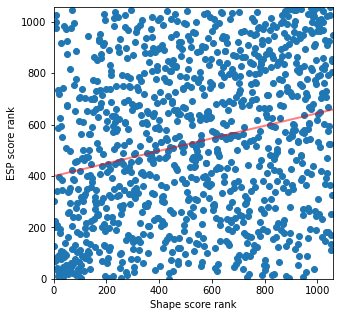

In [12]:
# SHAPE VS ESP

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("ESP score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_ESP ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_ESP)
SpearRank(rank_Gas_Shape, rank_Gas_ESP)



Correlation coeffcient = 0.529
Spearmans correlation coefficient: 0.728


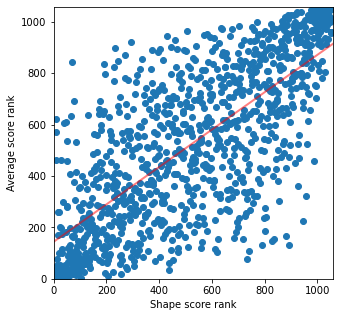

In [13]:
# SHAPE VS AVERAGE  

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_avr)
SpearRank(rank_Gas_Shape, rank_Gas_avr)

Correlation coeffcient = 0.658
Spearmans correlation coefficient: 0.811


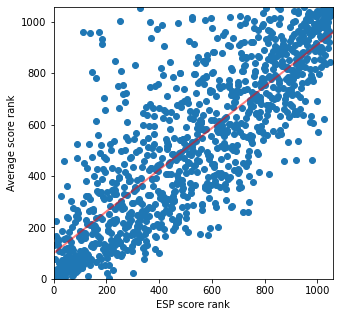

In [14]:
# EPS VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("ESP score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_ESP, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_ESP, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_ESP, rank_Gas_avr)
SpearRank(rank_Gas_ESP, rank_Gas_avr)

COMPARING SIMILARITY SCORES BETWEEN GASTEIGER AND MMFF

Correlation coeffcient = 1.000
Spearmans correlation coefficient: 1.000


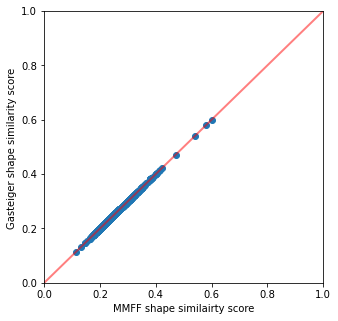

In [15]:
# SHAPE SCORE 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("MMFF shape similairty score")
plt.ylabel("Gasteiger shape similarity score ")

ax.scatter (simShape_mmff, simShape_Gas) 

RegLine(simShape_mmff, simShape_Gas)
CorrCoef(simShape_mmff, simShape_Gas)
SpearRank(simShape_mmff, simShape_Gas)


Correlation coeffcient = 0.338
Spearmans correlation coefficient: 0.535


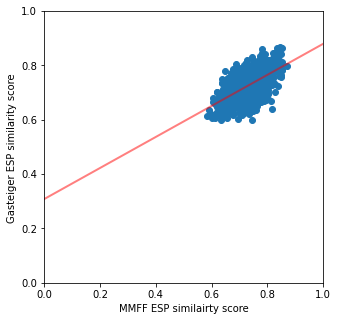

In [16]:
# ESP SCORE

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("MMFF ESP similairty score")
plt.ylabel("Gasteiger ESP similarity score ")

ax.scatter (simEsp_mmff, simEsp_Gas) 

RegLine(simEsp_mmff, simEsp_Gas)
CorrCoef(simEsp_mmff, simEsp_Gas)
SpearRank(simEsp_mmff, simEsp_Gas)

Correlation coeffcient = 0.679
Spearmans correlation coefficient: 0.766


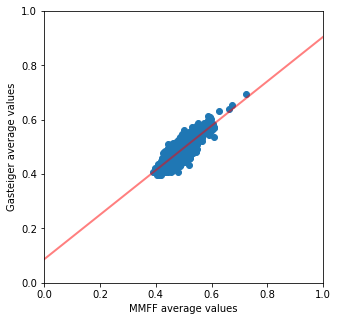

In [17]:
# Average SCORE

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("MMFF average values")
plt.ylabel("Gasteiger average values")

ax.scatter (avrlist_mmff, avrlist_Gas ) 

RegLine(avrlist_mmff, avrlist_Gas)
CorrCoef(avrlist_mmff, avrlist_Gas)
SpearRank(avrlist_mmff, avrlist_Gas)


COMPARING RANKINGS BETWEEN GASTEIGER AND MMFF

Correlation coeffcient = 1.000
Spearmans correlation coefficient: 1.000


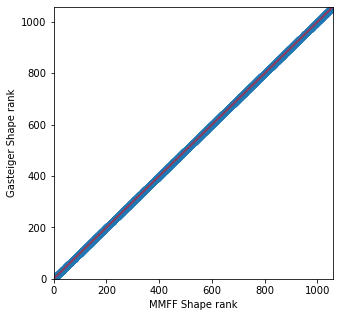

In [18]:
# SHAPE RANK

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_Shape)) # for ranking the axis follows the list of the data 
plt.ylim(0,len(rank_mmff_Shape))
plt.xlabel("MMFF Shape rank")
plt.ylabel("Gasteiger Shape rank")

ax.scatter (rank_mmff_Shape,rank_Gas_Shape) 


b, a = np.polyfit(rank_mmff_Shape,rank_Gas_Shape, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)


CorrCoef(rank_mmff_Shape,rank_Gas_Shape)
SpearRank(rank_mmff_Shape,rank_Gas_Shape)


Correlation coeffcient = 0.286
Spearmans correlation coefficient: 0.535


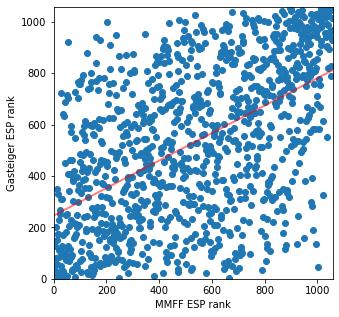

In [19]:
# ESP RANK

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_ESP))
plt.ylim(0,len(rank_mmff_ESP))
plt.xlabel("MMFF ESP rank")
plt.ylabel("Gasteiger ESP rank")

ax.scatter (rank_mmff_ESP,rank_Gas_ESP) 

b, a = np.polyfit(rank_mmff_ESP,rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_ESP,rank_Gas_ESP)
SpearRank(rank_mmff_ESP,rank_Gas_ESP)


Correlation coeffcient = 0.587
Spearmans correlation coefficient: 0.766


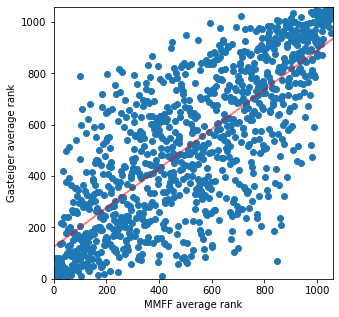

In [20]:
# AVERAGE RANK

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_avr)+1) # +1 for better presentation
plt.ylim(0,len(rank_mmff_avr)+1)
plt.xlabel("MMFF average rank")
plt.ylabel("Gasteiger average rank")

ax.scatter (rank_mmff_avr,rank_Gas_avr) 

b, a = np.polyfit(rank_mmff_avr,rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_avr,rank_Gas_avr)
SpearRank(rank_mmff_avr,rank_Gas_avr)